In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from skimage import io
from PIL import Image
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
os.chdir('dog images 22')

In [3]:
os.getcwd()

'C:\\Users\\bsmat\\dog images 22'

In [4]:
combined_lst=os.listdir('./annotations/Annotation')

In [5]:
print(combined_lst)

['n02085620-Chihuahua', 'n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02088364-beagle', 'n02093754-Border_terrier', 'n02094433-Yorkshire_terrier', 'n02099601-golden_retriever', 'n02099712-Labrador_retriever', 'n02100236-German_short-haired_pointer', 'n02102318-cocker_spaniel', 'n02106166-Border_collie', 'n02106550-Rottweiler', 'n02106662-German_shepherd', 'n02108915-French_bulldog', 'n02109047-Great_Dane', 'n02110063-malamute', 'n02110185-Siberian_husky', 'n02110958-pug', 'n02112018-Pomeranian', 'n02112137-chow', 'n02113023-Pembroke', 'n02113799-standard_poodle']


In [6]:
Dog_name=[]
Dog_id=[]
for i in combined_lst:
    Dog_id.append(i[:9])
    Dog_name.append(i[10:])

print(Dog_name) #creating array of dog names
print(Dog_id) #creating array of dog id

['Chihuahua', 'Maltese_dog', 'Shih-Tzu', 'beagle', 'Border_terrier', 'Yorkshire_terrier', 'golden_retriever', 'Labrador_retriever', 'German_short-haired_pointer', 'cocker_spaniel', 'Border_collie', 'Rottweiler', 'German_shepherd', 'French_bulldog', 'Great_Dane', 'malamute', 'Siberian_husky', 'pug', 'Pomeranian', 'chow', 'Pembroke', 'standard_poodle']
['n02085620', 'n02085936', 'n02086240', 'n02088364', 'n02093754', 'n02094433', 'n02099601', 'n02099712', 'n02100236', 'n02102318', 'n02106166', 'n02106550', 'n02106662', 'n02108915', 'n02109047', 'n02110063', 'n02110185', 'n02110958', 'n02112018', 'n02112137', 'n02113023', 'n02113799']


In [7]:
for i in Dog_name:
    if os.path.isdir("train/" + i) is False:
        os.makedirs("train/" + i)
        os.makedirs("valid/" + i)
        os.makedirs("test/" + i)

if os.path.isdir("All files created") is False:
    j=0        
    for j in range(len(Dog_id)):
        for k in random.sample(glob.glob("all dogs/" + Dog_id[j] + "*"), 110):
            shutil.move(k,"train/" + Dog_name[j])
        for k in random.sample(glob.glob("all dogs/" + Dog_id[j] + "*"), 30):
            shutil.move(k,"valid/" + Dog_name[j])
        for k in random.sample(glob.glob("all dogs/" + Dog_id[j] + "*"), 10):
            shutil.move(k,"test/" + Dog_name[j])
        j=j+1
        
    os.makedirs("All files created")

    print("All test, train, and validation files created")
else:
    print("All test, train, and validation files already exist")
    

# Train, test, validation split

All test, train, and validation files already exist


In [8]:
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

# Data Augmentation

In [9]:
gen = ImageDataGenerator(rotation_range=25, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                        channel_shift_range=10., horizontal_flip=True)

In [10]:
if os.path.isdir("Images Augmented") is False:
    for j in Dog_name:
        dataset=[]
        image_directory = 'train/' + j + '/'
        my_images = os.listdir(image_directory)
        for k, image_name in enumerate(my_images):
            if (image_name.split(".")[1] == 'jpg'):
                image = io.imread(image_directory + image_name)
                image = Image.fromarray(image, 'RGB')
                image = image.resize((224,224))
                dataset.append(np.array(image))
        x = np.array(dataset)


        i=0
        for batch in gen.flow(x,
                              batch_size=20,
                              save_to_dir='train/' + j,
                              save_format='jpeg'):
            i=i+1
            if i>20:
                break
                
    for j in Dog_name:
        dataset=[]
        image_directory = 'valid/' + j + '/'
        my_images = os.listdir(image_directory)
        for k, image_name in enumerate(my_images):
            if (image_name.split(".")[1] == 'jpg'):
                image = io.imread(image_directory + image_name)
                image = Image.fromarray(image, 'RGB')
                image = image.resize((224,224))
                dataset.append(np.array(image))
        x = np.array(dataset)


        i=0
        for batch in gen.flow(x,
                              batch_size=10,
                              save_to_dir='valid/' + j,
                              save_format='jpeg'):
            i=i+1
            if i>20:
                break
    os.makedirs("Images Augmented")
else:
    print("Images already augmented")

#augmenting pictures for each class training set and depositing the pictures back into the approapriate training folders

Images already augmented


In [11]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=Dog_name, batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=Dog_name, batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=Dog_name, batch_size=10, shuffle=False)

#Preprocessing images for training

Found 10998 images belonging to 22 classes.
Found 5280 images belonging to 22 classes.
Found 220 images belonging to 22 classes.


In [12]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show
    
#for plotting of images

In [13]:
assert train_batches.n == 10998
assert valid_batches.n == 5280
assert test_batches.n == 220
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 22

In [14]:
imgs, labels = next(train_batches) #grabbing 10 images and 10 labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


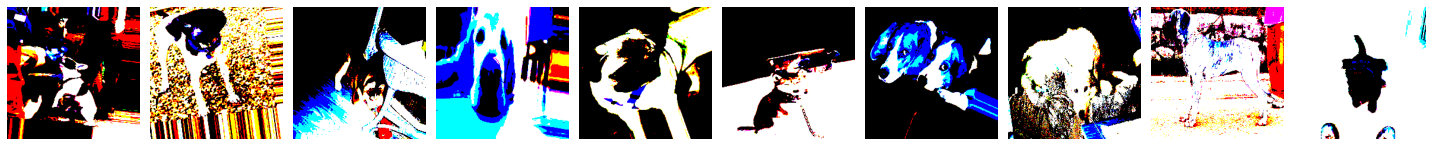

In [15]:
plot_images(imgs)
print(labels)

# Building and Training CNN Model

In [16]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation = "relu", padding = "same", input_shape = (224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    layers.Dropout(0.3),
    Conv2D(filters=64, kernel_size=(3,3), activation = "relu", padding = "same", input_shape = (224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=22, activation='softmax')
])

# model building

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #compiling model

In [20]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose = 2) #Model training, validation accuracy results are very poor

Epoch 1/10
1100/1100 - 331s - loss: 17.2680 - accuracy: 0.0845 - val_loss: 3.0886 - val_accuracy: 0.0564 - 331s/epoch - 301ms/step
Epoch 2/10
1100/1100 - 341s - loss: 2.7630 - accuracy: 0.1760 - val_loss: 3.0698 - val_accuracy: 0.0657 - 341s/epoch - 310ms/step
Epoch 3/10
1100/1100 - 327s - loss: 2.1204 - accuracy: 0.3646 - val_loss: 3.1532 - val_accuracy: 0.0657 - 327s/epoch - 298ms/step
Epoch 4/10
1100/1100 - 324s - loss: 1.0583 - accuracy: 0.6795 - val_loss: 3.6603 - val_accuracy: 0.0693 - 324s/epoch - 294ms/step
Epoch 5/10
1100/1100 - 323s - loss: 0.3801 - accuracy: 0.8844 - val_loss: 4.5879 - val_accuracy: 0.0739 - 323s/epoch - 294ms/step
Epoch 6/10
1100/1100 - 325s - loss: 0.2181 - accuracy: 0.9333 - val_loss: 5.2671 - val_accuracy: 0.0741 - 325s/epoch - 296ms/step
Epoch 7/10
1100/1100 - 324s - loss: 0.1469 - accuracy: 0.9553 - val_loss: 6.0363 - val_accuracy: 0.0708 - 324s/epoch - 294ms/step
Epoch 8/10
1100/1100 - 323s - loss: 0.0973 - accuracy: 0.9701 - val_loss: 6.4571 - val_ac

# Fine-tuned VGG16 Model

In [32]:
vgg16_model = tf.keras.applications.vgg16.VGG16() #using VGG16 model

In [33]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [34]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

# removing final layer to add output layer with the correct number of nodes

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [38]:
for layer in model.layers:
    layer.trainable = False

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [40]:
model.add(Dense(22, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [44]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #VGG16 model compiling

In [45]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2) #Model training

Epoch 1/5
1100/1100 - 1612s - loss: 0.7058 - accuracy: 0.7895 - val_loss: 0.4684 - val_accuracy: 0.8489 - 1612s/epoch - 1s/step
Epoch 2/5
1100/1100 - 1706s - loss: 0.2203 - accuracy: 0.9312 - val_loss: 0.4534 - val_accuracy: 0.8562 - 1706s/epoch - 2s/step
Epoch 3/5
1100/1100 - 1495s - loss: 0.1280 - accuracy: 0.9627 - val_loss: 0.4406 - val_accuracy: 0.8568 - 1495s/epoch - 1s/step
Epoch 4/5
1100/1100 - 1456s - loss: 0.0781 - accuracy: 0.9839 - val_loss: 0.4592 - val_accuracy: 0.8583 - 1456s/epoch - 1s/step
Epoch 5/5
1100/1100 - 1449s - loss: 0.0509 - accuracy: 0.9928 - val_loss: 0.4704 - val_accuracy: 0.8634 - 1449s/epoch - 1s/step


# Predict using VGG16 Model

In [46]:
predictions = model.predict(x=test_batches, verbose = 0)

In [47]:
test_batches.classes #array of classes for test case

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21])

In [48]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1)) #creating a confusion matrix

In [49]:
test_batches.class_indices

{'Chihuahua': 0,
 'Maltese_dog': 1,
 'Shih-Tzu': 2,
 'beagle': 3,
 'Border_terrier': 4,
 'Yorkshire_terrier': 5,
 'golden_retriever': 6,
 'Labrador_retriever': 7,
 'German_short-haired_pointer': 8,
 'cocker_spaniel': 9,
 'Border_collie': 10,
 'Rottweiler': 11,
 'German_shepherd': 12,
 'French_bulldog': 13,
 'Great_Dane': 14,
 'malamute': 15,
 'Siberian_husky': 16,
 'pug': 17,
 'Pomeranian': 18,
 'chow': 19,
 'Pembroke': 20,
 'standard_poodle': 21}

In [66]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=70, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
        
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center', fontsize=20,
                color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)
    
#plotting of confusion matrix

Confusion matrix, without normalization
[[ 8  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1]
 [ 0  2  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  6  1  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  9  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  

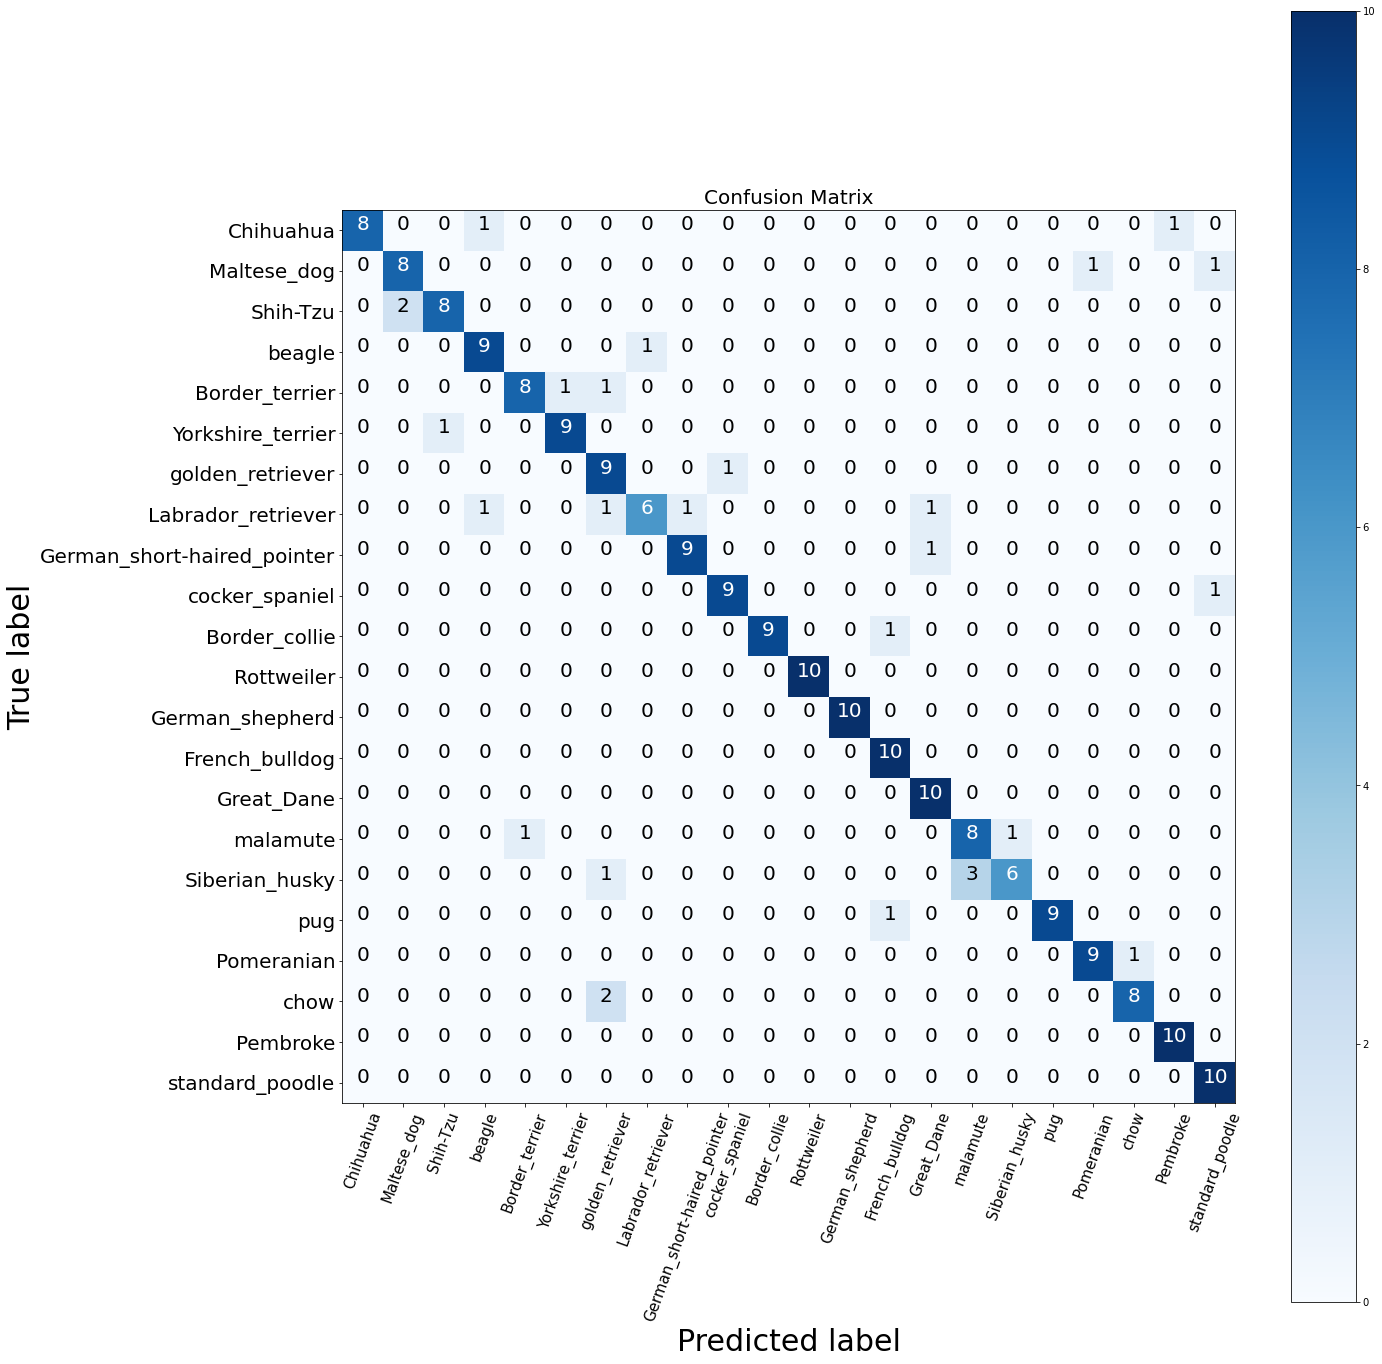

In [67]:
cm_plot_labels = Dog_name
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Saving the model

In [2]:
import os
try:
    os.chdir('dog images 22')
    print("Current working directory: {0}".format(os.getcwd()))
except FileNotFoundError:
    print("Directory already set".format('dog images 22'))

Current working directory: C:\Users\bsmat\dog images 22


In [3]:
if os.path.isfile('models/deep_learning_dogs.h5') is False:
    model.save('models/deep_learning_dogs.h5')
    
#if the model is not save yet, save the model

In [4]:
from tensorflow.keras.models import load_model
new_model = load_model('models/deep_learning_dogs.h5')

#loading the model to test

In [5]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [6]:
new_model.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [7]:
new_model.optimizer